findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


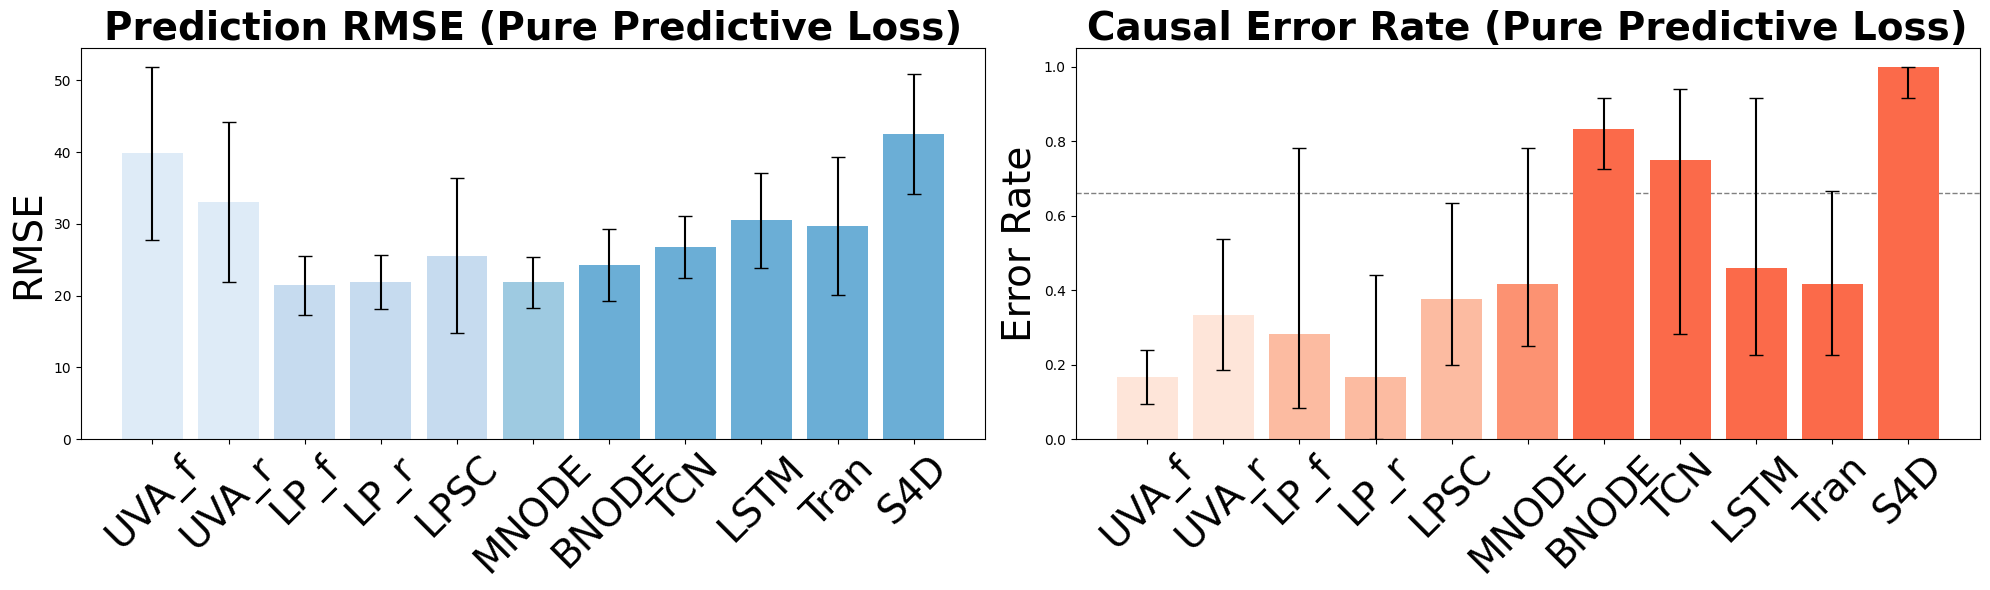

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import matplotlib
import numpy as np

# Change the font globally to Times New Roman
matplotlib.rcParams['font.family'] = 'Times New Roman'

# Data initialization
alphas = ["0", "1e-4", "1e-3", "1e-2", "1e-1", "1"]
alphas_n = [0, 1e-4, 1e-3, 1e-2, 1e-1, 1]
models = ["UVA_f", "UVA_r", "LP_f", "LP_r", "LPSC", "MNODE", "BNODE", "TCN","LSTM","Tran","S4D"]
labels = ["UVA_f", "UVA_r", "LP_f", "LP_r", "LPSC", "MNODE", "BNODE", "TCN","LSTM","Tran","S4D"]


# Custom colors for the bars
colors = ['#b3cde3','#b3cde3',  # Very light blue for UVA
          '#8c96c6', '#8c96c6', '#8c96c6', # Lighter blue for LP and LPSC
          '#8856a7',  # Medium blue for MNODE
          '#810f7c', '#810f7c', '#810f7c', '#810f7c', '#810f7c']  # Darker blue for the rest

data_pred={}
data_rank={}
for mod in models:
    mod2=mod
    #if mod=="MNODE":
    #    mod2=mod+"2"
    if mod=="UVA_f":
        mod2="UVA_full"
    if mod=="UVA_r":
        mod2="UVA_reduced"
    if mod=="LP_f":
        mod2="LP_full"
    if mod=="LP_r":
        mod2="LP_reduced"
    if mod=="LPSC":
        mod2="LPSC_reduced"
    pred=[]
    causal=[]
    for a in alphas_n:
        rmse=np.load(f"{mod2}_a{a}_pred.npy")
        er=np.load(f"{mod2}_a{a}_causal.npy")
        pred.append(f"{np.mean(rmse)}/{np.std(rmse)}")    
        causal.append(f"{np.quantile(er,0.1)}/{np.quantile(er,0.5)}/{np.quantile(er,0.9)}")  
    data_pred[mod]=pred
    data_rank[mod]=causal

#data_pred = {
#    "UVA": ['40.857/12.73', '40.861/12.718', '40.898/12.726', '40.791/12.457', '40.792/12.55', '60.971/18.486'],
#    "LP": ['21.861/4.101', '21.938/4.021', '22.099/3.952', '21.896/3.505', '20.596/3.743', '40.674/8.981'],
#    "LPSC":['23.282/4.09', '24.444/6.618', '24.914/7.126', '23.215/4.213', '23.771/5.07', '67.058/15.389'],
#    "MNODE": ['21.947/3.012', '21.761/3.298', '21.326/3.068', '20.849/3.499', '21.361/2.746', '30.035/12.512'],
#    "BNODE": ['24.265/5.042', '24.597/5.68', '23.531/3.87', '23.507/4.112', '26.299/5.895', '54.911/13.822'],
#    "TCN": ['26.776/4.363', '26.03/3.518', '26.446/4.771', '25.528/4.125', '29.325/7.337', '51.176/13.292'],
#    "LSTM": ['30.497/6.62', '31.224/7.506', '30.759/7.165', '31.853/7.302', '34.789/6.634', '50.967/14.146'],
#    "Tran": ['33.886/8.323', '33.329/9.036', '33.286/8.607', '31.445/8.071', '34.08/10.833', '54.159/13.793'],
#    "S4D": ['42.576/8.36', '43.189/8.336', '43.5/8.411', '46.123/8.355', '45.135/8.984', '51.61/14.913']
#}

#data_rank={
#    "UVA": ['0.095/0.167/0.239', '0.095/0.167/0.239', '0.095/0.167/0.239', '0.095/0.167/0.239', '0.095/0.167/0.239', '0.095/0.167/0.239'],
#    "LP": ['0.0/0.167/0.333', '0.0/0.042/0.275', '0.0/0.0/0.025', '0.0/0.0/0.0', '0.0/0.0/0.0', '0.0/0.0/0.0'],
#    "LPSC": ['0.167/0.292/0.692', '0.083/0.333/0.583', '0.0/0.083/0.217', '0.0/0.0/0.083', '0.0/0.0/0.083', '0.0/0.0/0.0'],
#    "MNODE": ['0.25/0.375/0.692', '0.058/0.167/0.525', '0.0/0.0/0.25', '0.0/0.0/0.083', '0.0/0.0/0.0', '0.0/0.0/0.108'],
#    "BNODE": ['0.725/0.833/0.917', '0.258/0.833/0.917', '0.0/0.167/0.542', '0.0/0.0/0.083', '0.0/0.0/0.083', '0.0/0.0/0.292'],
#    "TCN": ['0.283/0.75/0.942', '0.167/0.416/0.75', '0.0/0.125/0.583', '0.0/0.042/0.108', '0.0/0.0/0.108', '0.0/0.0/0.0'],
#    "LSTM": ['0.225/0.458/0.917', '0.0/0.25/0.608', '0.0/0.083/0.333', '0.0/0.0/0.083', '0.0/0.0/0.083', '0.0/0.0/0.0'],
#    "Tran": ['0.225/0.417/0.608', '0.083/0.333/0.583', '0.058/0.125/0.25', '0.0/0.0/0.108', '0.0/0.0/0.108', '0.0/0.083/0.167'],
#    "S4D": ['0.917/1.0/1.0', '0.917/0.917/1.0', '0.725/0.917/1.0', '0.0/0.25/0.775', '0.0/0.125/0.277', '0.0/0.167/0.333']
#}




def get_values_errors(data_dict):
    values = [[float(data_dict[model][alpha].split('/')[0]) for alpha in range(len(alphas))] for model in models]
    errors = [[float(data_dict[model][alpha].split('/')[1]) for alpha in range(len(alphas))] for model in models]
    return np.array(values), np.array(errors)


def get_rank_errors(data_dict): 
    values = [[float(data_dict[model][alpha].split('/')[1]) for alpha in range(len(alphas))] for model in models]
    errors1 = [[float(data_dict[model][alpha].split('/')[0]) for alpha in range(len(alphas))] for model in models]
    errors2 = [[float(data_dict[model][alpha].split('/')[2]) for alpha in range(len(alphas))] for model in models]
    return np.array(values), np.array(errors1), np.array(errors2)


pred_values, pred_errors = get_values_errors(data_pred)
rank_values, rank_errors1, rank_errors2 = get_rank_errors(data_rank)


# Custom colors for prediction bars in light blues
colors_blue = ['#deebf7', '#deebf7',  # Very light blue for UVA
               '#c6dbef', '#c6dbef', '#c6dbef', # Second lightest blue for LP and LPSC
               '#9ecae1',  # Third lightest blue for MNODE
               '#6baed6', '#6baed6', '#6baed6', '#6baed6', '#6baed6']  # Fourth lightest blue for the rest

# Custom colors for ranking bars in light reds
colors_red = ['#fee5d9', '#fee5d9', # Very light red for UVA
              '#fcbba1', '#fcbba1', '#fcbba1',# Second lightest red for LP and LPSC
              '#fc9272',  # Third lightest red for MNODE
              '#fb6a4a', '#fb6a4a', '#fb6a4a', '#fb6a4a', '#fb6a4a']  # Fourth lightest red for the rest

# Now, let's create the plots
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot for prediction values
axes[0].bar(models, pred_values[:,0], yerr=pred_errors[:,0], color=colors_blue, capsize=5)
axes[0].set_title('Prediction RMSE (Pure Predictive Loss)', fontsize=28, fontweight='bold')
axes[0].set_xticks(range(len(labels)))
axes[0].set_xticklabels(labels, rotation=45, fontsize=28, ha="center")
axes[0].set_ylabel('RMSE', fontsize=28)

# Plot for ranking values
axes[1].bar(models, rank_values[:,0], yerr=[rank_values[:,0]-rank_errors1[:,0],\
                                             rank_errors2[:,0]-rank_values[:,0]], color=colors_red, capsize=5)
axes[1].set_title('Causal Error Rate (Pure Predictive Loss)', fontsize=28, fontweight='bold')
axes[1].set_xticks(range(len(labels)))
axes[1].set_xticklabels(labels, rotation=45, fontsize=28, ha="center")
axes[1].set_ylabel('Error Rate', fontsize=28)

# Add a dashed light gray horizontal line at y=0.33 in the ranking subplot
axes[1].axhline(y=0.66, color='gray', linestyle='--', linewidth=1, zorder=0)

plt.tight_layout()
plt.savefig("alpha0pred_and_causal.png", format='png', dpi=300)  # You can adjust the filename, format, and dpi as needed
plt.show()


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


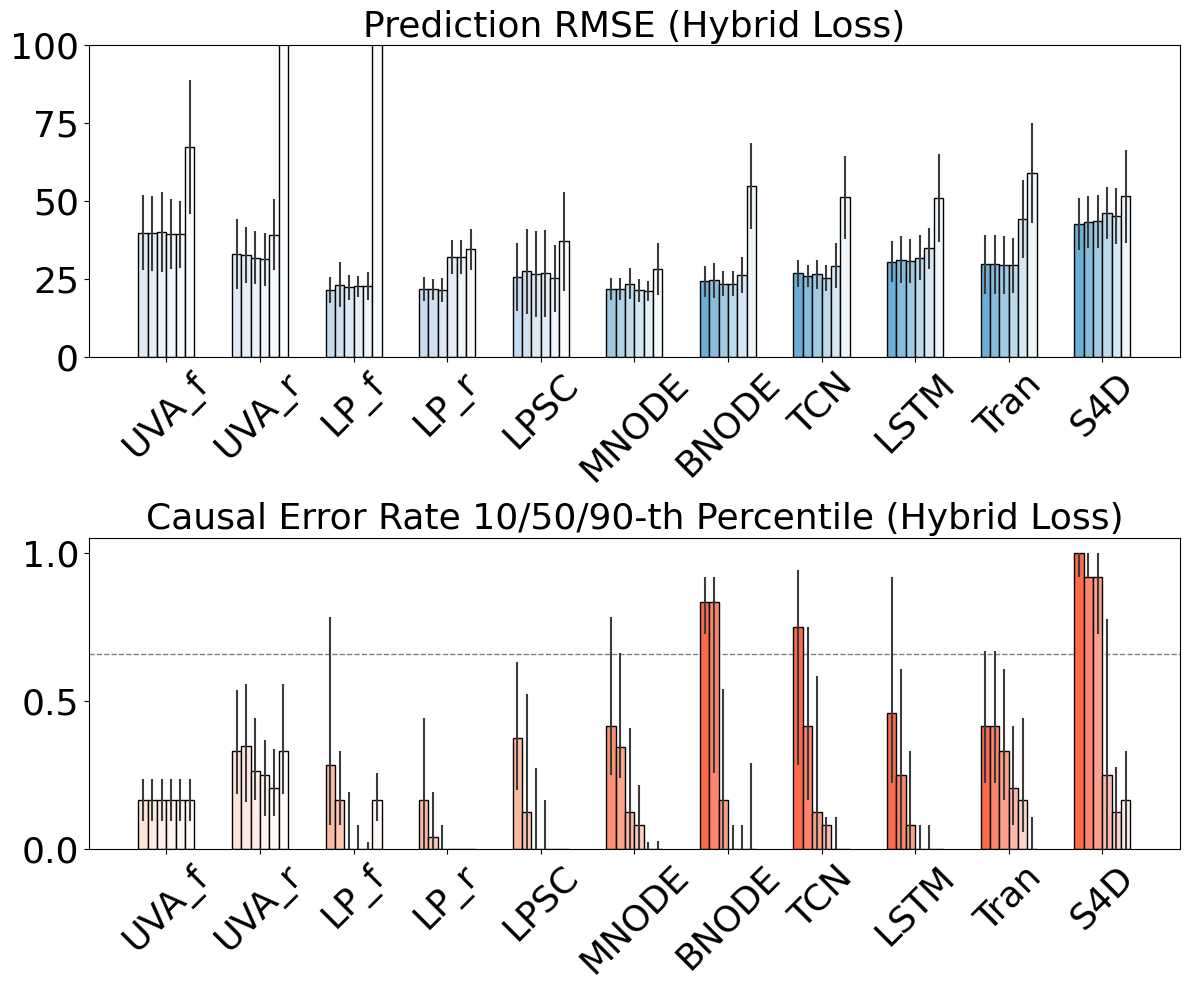

In [2]:
alphas = ["0", "1e-4", "1e-3", "1e-2", "1e-1", "1"]
alphas_n = [0, 1e-4, 1e-3, 1e-2, 1e-1, 1]
models = ["UVA_f", "UVA_r", "LP_f", "LP_r", "LPSC", "MNODE", "BNODE", "TCN","LSTM","Tran","S4D"]
labels = ["UVA_f", "UVA_r", "LP_f", "LP_r", "LPSC", "MNODE", "BNODE", "TCN","LSTM","Tran","S4D"]




# Custom colors for the bars
colors = ['#b3cde3','#b3cde3',  # Very light blue for UVA
          '#8c96c6','#8c96c6', '#8c96c6',  # Lighter blue for LP and LPSC
          '#8856a7',  # Medium blue for MNODE
          '#810f7c', '#810f7c', '#810f7c', '#810f7c', '#810f7c']  # Darker blue for the rest

colors_blue = ['#deebf7', '#deebf7',  # Very light blue for UVA
               '#c6dbef', '#c6dbef','#c6dbef',  # Second lightest blue for LP and LPSC
               '#9ecae1',  # Third lightest blue for MNODE
               '#6baed6', '#6baed6', '#6baed6', '#6baed6', '#6baed6']  # Fourth lightest blue for the rest

# Custom colors for ranking bars in light reds
colors_red = ['#fee5d9', '#fee5d9',  # Very light red for UVA
              '#fcbba1', '#fcbba1','#fcbba1',  # Second lightest red for LP and LPSC
              '#fc9272',  # Third lightest red for MNODE
              '#fb6a4a', '#fb6a4a', '#fb6a4a', '#fb6a4a', '#fb6a4a'] 




pred_values, pred_errors = get_values_errors(data_pred)
rank_values, rank_errors1, rank_errors2 = get_rank_errors(data_rank)

# Creating two subplots, one for data_pred and one for data_rank
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10),facecolor='white')

bar_width = 0.1
index = np.arange(len(models))

def get_gradation_colors(base_color, n):
    """Generates a gradation of colors from a base color to a lighter shade."""
    color = mcolors.to_rgb(base_color)
    # Adjust the factor to control the rate of color change
    factor = 0.9  # Adjust this value as needed to control the darkness
    return [mcolors.to_hex((color[0] + (1 - color[0]) * i / (n - 1) * factor, 
                            color[1] + (1 - color[1]) * i / (n - 1) * factor, 
                            color[2] + (1 - color[2]) * i / (n - 1) * factor)) for i in range(n)]

# Generate gradation colors for each model for predictions
gradation_colors_blue = [get_gradation_colors(color, len(alphas)) for color in colors_blue]

# Generate gradation colors for each model for rankings
gradation_colors_red = [get_gradation_colors(color, len(alphas)) for color in colors_red]

# Plotting bars with gradation colors for data_pred
for i, model in enumerate(models):
    for j, alpha in enumerate(alphas):
        ax1.bar(index[i] + j*bar_width, pred_values[i][j], yerr=pred_errors[i][j], 
                color=gradation_colors_blue[i][j], edgecolor='black', ecolor='#3b3b3b', 
                width=bar_width, label=f'α={alpha}' if i == 0 else "")

# Plotting bars with gradation colors for data_rank
for i, model in enumerate(models):
    for j, alpha in enumerate(alphas):
        ax2.bar(index[i] + j*bar_width, rank_values[i][j], yerr=[[rank_values[i][j]-rank_errors1[i][j]],\
                                                                 [rank_errors2[i][j]-rank_values[i][j]]], 
                color=gradation_colors_red[i][j], edgecolor='black', ecolor='#3b3b3b', 
                width=bar_width, label=f'α={alpha}' if i == 0 else "")


# Customizing the plot for aesthetics
ax1.set_title('Prediction RMSE (Hybrid Loss)', fontsize=26)
ax1.set_ylim([0,100])
ax2.set_title('Causal Error Rate 10/50/90-th Percentile (Hybrid Loss)', fontsize=26)
ax1.set_xticks(index + bar_width * 2.5)
ax2.set_xticks(index + bar_width * 2.5)
ax1.set_xticklabels(models, rotation=45, fontsize=26, color='black')
ax2.set_xticklabels(models, rotation=45, fontsize=26, color='black')
ax1.tick_params(axis='y', labelsize=26)  # Adjust the labelsize as needed for the first subplot
ax2.tick_params(axis='y', labelsize=26)  # Adjust the labelsize as needed for the second subplot

# Add a dashed light gray horizontal line at y=0.33 in the ranking subplot
ax2.axhline(y=0.66, color='gray', linestyle='--', linewidth=1, zorder=0)

plt.tight_layout()
plt.savefig("alphas_pred_and_causal.png", format='png', dpi=300)  # You can adjust the filename, format, and dpi as needed
plt.show()

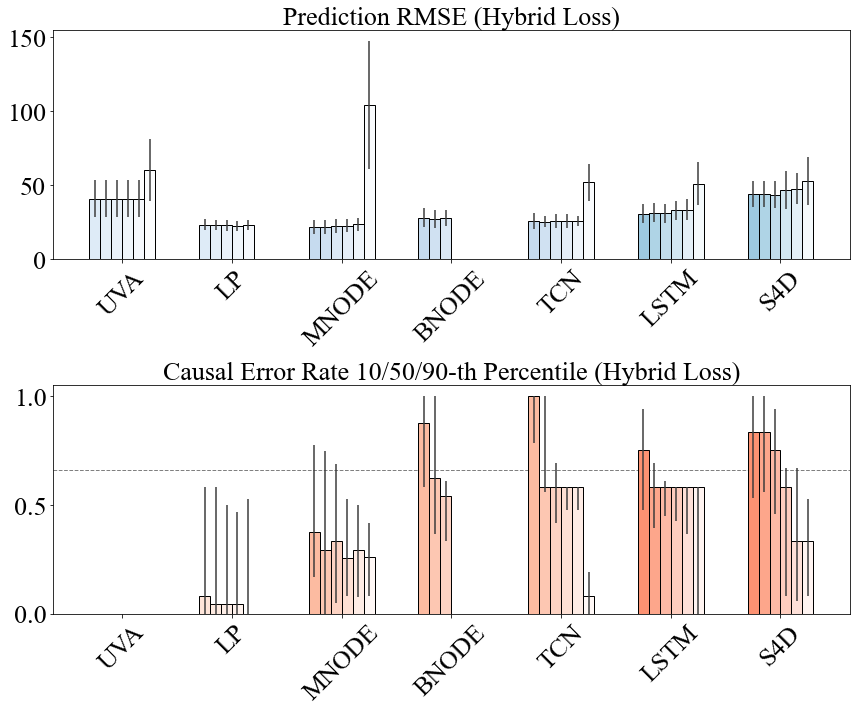

In [26]:
#incomplete 1

alphas = ["0", "1e-4", "1e-3", "1e-2", "1e-1", "1"]
models = ['UVA',"LP", "MNODE","BNODE", "TCN","LSTM",'S4D']
labels = models


# Custom colors for the bars
colors = ['#b3cde3',  # Very light blue for UVA
          '#8c96c6',  # Lighter blue for LP and LPSC
          '#8856a7',  # Medium blue for MNODE
          '#810f7c', '#810f7c', '#810f7c','#810f7c']  # Darker blue for the rest

data_pred = {
    "UVA": ['40.857/12.73', '40.857/12.73', '40.866/12.725', '40.873/12.71', '40.849/12.72', '60.037/21.063'],
    "LP": ['23.255/3.504', '22.995/3.43', '22.857/3.7', '22.515/3.438', '22.735/3.376', '0/0'],
    "MNODE": ['21.874/4.745', '21.956/4.756', '22.386/4.578', '22.624/4.473', '23.497/4.428', '104.096/43.194'],
    "BNODE": ['27.881/6.412', '27.135/6.209', '27.689/5.174', '0/0', '0/0', '0/0'],
    "TCN": ['25.627/5.368', '25.198/3.555', '25.826/4.919', '25.594/4.518', '25.557/3.3', '51.773/12.768'],
    "LSTM": ['30.776/6.376', '31.336/6.277', '30.866/6.458', '32.87/6.691', '33.447/6.916', '51.045/14.732'],
    "S4D": ['43.878/8.656', '43.809/8.67', '43.622/9.094', '46.707/13.079', '47.665/10.644', '52.696/16.249']
}

data_rank={
    "UVA": ['0.0/0.0/0.0', '0.0/0.0/0.0', '0.0/0.0/0.0', '0.0/0.0/0.0', '0.0/0.0/0.0', '0.0/0.0/0.0'],
    "LP": ['0.0/0.083/0.583', '0.0/0.042/0.583', '0.0/0.042/0.5', '0.0/0.042/0.467', '0.0/0.0/0.525', '0/0/0'],
    "MNODE": ['0.167/0.375/0.775', '0.0/0.292/0.746', '0.05/0.333/0.688', '0.083/0.256/0.525', '0.075/0.291/0.5', '0.083/0.259/0.414'],
    "BNODE": ['0.583/0.875/1.0', '0.367/0.625/1.0', '0.333/0.542/0.608', '0/0/0', '0/0/0', '0/0/0'],
    "TCN": ['0.783/1.0/1.0', '0.558/0.583/1.0', '0.417/0.583/0.692', '0.475/0.583/0.583', '0.475/0.583/0.583', '0.0/0.08/0.192'],
    "LSTM": ['0.475/0.75/0.942', '0.392/0.583/0.692', '0.45/0.583/0.608', '0.425/0.583/0.583', '0.367/0.583/0.583', '0.0/0.583/0.583'],
    "S4D": ['0.533/0.833/1.0', '0.558/0.833/1.0', '0.458/0.75/0.942', '0.083/0.583/0.667', '0.058/0.334/0.667', '0.083/0.333/0.525']
}



pred_values, pred_errors = get_values_errors(data_pred)
rank_values, rank_errors1, rank_errors2 = get_rank_errors(data_rank)

# Creating two subplots, one for data_pred and one for data_rank
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10),facecolor='white')

bar_width = 0.1
index = np.arange(len(models))

def get_gradation_colors(base_color, n):
    """Generates a gradation of colors from a base color to a lighter shade."""
    color = mcolors.to_rgb(base_color)
    # Adjust the factor to control the rate of color change
    factor = 0.9  # Adjust this value as needed to control the darkness
    return [mcolors.to_hex((color[0] + (1 - color[0]) * i / (n - 1) * factor, 
                            color[1] + (1 - color[1]) * i / (n - 1) * factor, 
                            color[2] + (1 - color[2]) * i / (n - 1) * factor)) for i in range(n)]

# Generate gradation colors for each model for predictions
gradation_colors_blue = [get_gradation_colors(color, len(alphas)) for color in colors_blue]

# Generate gradation colors for each model for rankings
gradation_colors_red = [get_gradation_colors(color, len(alphas)) for color in colors_red]

# Plotting bars with gradation colors for data_pred
for i, model in enumerate(models):
    for j, alpha in enumerate(alphas):
        ax1.bar(index[i] + j*bar_width, pred_values[i][j], yerr=pred_errors[i][j], 
                color=gradation_colors_blue[i][j], edgecolor='black', ecolor='#3b3b3b', 
                width=bar_width, label=f'α={alpha}' if i == 0 else "")

# Plotting bars with gradation colors for data_rank
for i, model in enumerate(models):
    for j, alpha in enumerate(alphas):
        ax2.bar(index[i] + j*bar_width, rank_values[i][j], yerr=[[rank_values[i][j]-rank_errors1[i][j]],\
                                                                 [rank_errors2[i][j]-rank_values[i][j]]], 
                color=gradation_colors_red[i][j], edgecolor='black', ecolor='#3b3b3b', 
                width=bar_width, label=f'α={alpha}' if i == 0 else "")


# Customizing the plot for aesthetics
ax1.set_title('Prediction RMSE (Hybrid Loss)', fontsize=26)
ax2.set_title('Causal Error Rate 10/50/90-th Percentile (Hybrid Loss)', fontsize=26)
ax1.set_xticks(index + bar_width * 2.5)
ax2.set_xticks(index + bar_width * 2.5)
ax1.set_xticklabels(models, rotation=45, fontsize=26, color='black')
ax2.set_xticklabels(models, rotation=45, fontsize=26, color='black')
ax1.tick_params(axis='y', labelsize=26)  # Adjust the labelsize as needed for the first subplot
ax2.tick_params(axis='y', labelsize=26)  # Adjust the labelsize as needed for the second subplot

# Add a dashed light gray horizontal line at y=0.33 in the ranking subplot
ax2.axhline(y=0.66, color='gray', linestyle='--', linewidth=1, zorder=0)

plt.tight_layout()
plt.savefig("alphas_pred_and_causal.png", format='png', dpi=300)  # You can adjust the filename, format, and dpi as needed
plt.show()

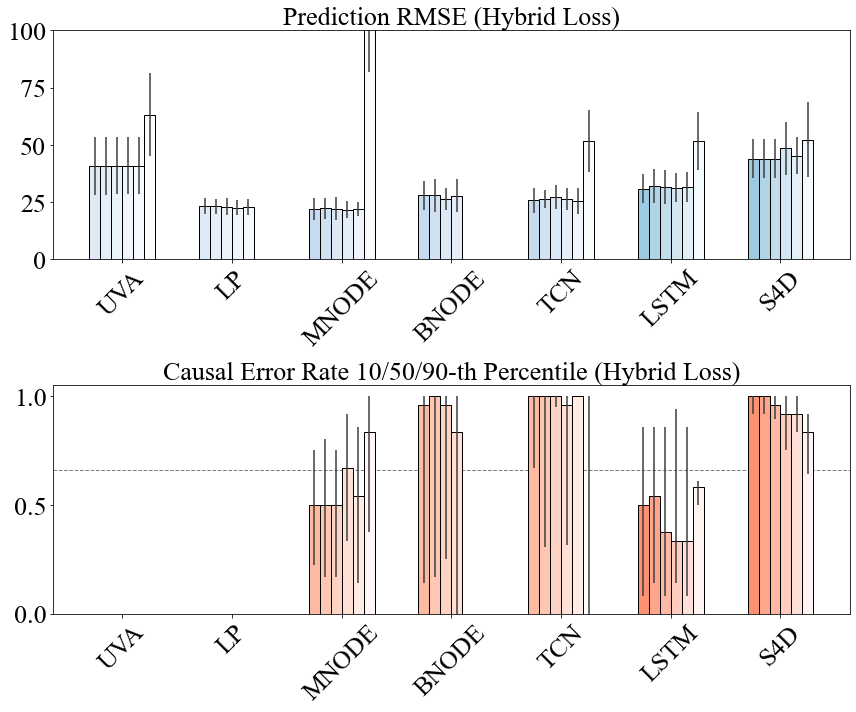

In [18]:
#incomplete 2

alphas = ["0", "1e-4", "1e-3", "1e-2", "1e-1", "1"]
models = ['UVA',"LP", "MNODE","BNODE", "TCN","LSTM",'S4D']
labels = models


# Custom colors for the bars
colors = ['#b3cde3',  # Very light blue for UVA
          '#8c96c6',  # Lighter blue for LP and LPSC
          '#8856a7',  # Medium blue for MNODE
          '#810f7c', '#810f7c', '#810f7c','#810f7c']  # Darker blue for the rest

data_pred = {
    "UVA": ['40.857/12.73', '40.863/12.726', '40.749/12.476', '40.787/12.554', '40.775/12.554', '63.183/18.227'],
    "LP": ['23.255/3.504', '22.995/3.43', '22.857/3.7', '22.515/3.438', '22.735/3.376', '0/0'],
    "MNODE": ['21.874/4.745', '22.092/4.794', '22.005/5.042', '21.602/3.744', '21.908/3.089', '189.323/107.468'],
    "BNODE": ['27.881/6.412', '27.875/7.144', '26.354/4.742', '27.666/7.183', '0/0', '0/0'],
    "TCN": ['25.627/5.368', '26.422/3.946', '27.195/5.179', '26.299/4.938', '25.529/5.656', '51.579/13.558'],
    "LSTM": ['30.776/6.376', '31.941/7.329', '31.641/7.458', '31.262/6.543', '31.448/6.717', '51.594/12.649'],
    "S4D": ['43.878/8.656', '43.962/8.617', '43.926/8.614', '48.4/11.645', '45.216/8.083', '52.24/16.544']
}

data_rank={
    "UVA": ['0.0/0.0/0.0', '0.0/0.0/0.0', '0.0/0.0/0.0', '0.0/0.0/0.0', '0.0/0.0/0.0', '0.0/0.0/0.0'],
    "LP": ['0.0/0.0/0.0', '0.0/0.0/0.0', '0.0/0.0/0.0', '0.0/0.0/0.0', '0.0/0.0/0.0', '0/0/0'],
    "MNODE": ['0.225/0.5/0.75', '0.167/0.5/0.8', '0.167/0.5/0.75', '0.333/0.667/0.917', '0.142/0.542/0.858', '0.375/0.833/1.0'],
    "BNODE": ['0.142/0.958/1.0', '0.167/1.0/1.0', '0.25/0.958/1.0', '0.0/0.834/1.0', '0/0/0', '0/0/0'],
    "TCN": ['0.667/1.0/1.0', '0.308/1.0/1.0', '0.95/1.0/1.0', '0.317/0.958/1.0', '1.0/1.0/1.0', '0.0/0.0/1.0'],
    "LSTM": ['0.083/0.5/0.858', '0.142/0.542/0.858', '0.083/0.375/0.858', '0.142/0.333/0.942', '0.083/0.333/0.858', '0.5/0.583/0.608'],
    "S4D": ['0.917/1.0/1.0', '0.917/1.0/1.0', '0.892/0.958/1.0', '0.75/0.917/1.0', '0.833/0.917/1.0', '0.642/0.833/0.917']
}



pred_values, pred_errors = get_values_errors(data_pred)
rank_values, rank_errors1, rank_errors2 = get_rank_errors(data_rank)

# Creating two subplots, one for data_pred and one for data_rank
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

bar_width = 0.1
index = np.arange(len(models))

def get_gradation_colors(base_color, n):
    """Generates a gradation of colors from a base color to a lighter shade."""
    color = mcolors.to_rgb(base_color)
    # Adjust the factor to control the rate of color change
    factor = 0.9  # Adjust this value as needed to control the darkness
    return [mcolors.to_hex((color[0] + (1 - color[0]) * i / (n - 1) * factor, 
                            color[1] + (1 - color[1]) * i / (n - 1) * factor, 
                            color[2] + (1 - color[2]) * i / (n - 1) * factor)) for i in range(n)]

# Generate gradation colors for each model for predictions
gradation_colors_blue = [get_gradation_colors(color, len(alphas)) for color in colors_blue]

# Generate gradation colors for each model for rankings
gradation_colors_red = [get_gradation_colors(color, len(alphas)) for color in colors_red]

# Plotting bars with gradation colors for data_pred
for i, model in enumerate(models):
    for j, alpha in enumerate(alphas):
        ax1.bar(index[i] + j*bar_width, pred_values[i][j], yerr=pred_errors[i][j], 
                color=gradation_colors_blue[i][j], edgecolor='black', ecolor='#3b3b3b', 
                width=bar_width, label=f'α={alpha}' if i == 0 else "")

# Plotting bars with gradation colors for data_rank
for i, model in enumerate(models):
    for j, alpha in enumerate(alphas):
        ax2.bar(index[i] + j*bar_width, rank_values[i][j], yerr=[[rank_values[i][j]-rank_errors1[i][j]],\
                                                                 [rank_errors2[i][j]-rank_values[i][j]]], 
                color=gradation_colors_red[i][j], edgecolor='black', ecolor='#3b3b3b', 
                width=bar_width, label=f'α={alpha}' if i == 0 else "")


# Customizing the plot for aesthetics
ax1.set_title('Prediction RMSE (Hybrid Loss)', fontsize=26)
ax1.set_ylim([0,100])
ax2.set_title('Causal Error Rate 10/50/90-th Percentile (Hybrid Loss)', fontsize=26)
ax1.set_xticks(index + bar_width * 2.5)
ax2.set_xticks(index + bar_width * 2.5)
ax1.set_xticklabels(models, rotation=45, fontsize=26, color='black')
ax2.set_xticklabels(models, rotation=45, fontsize=26, color='black')
ax1.tick_params(axis='y', labelsize=26)  # Adjust the labelsize as needed for the first subplot
ax2.tick_params(axis='y', labelsize=26)  # Adjust the labelsize as needed for the second subplot

# Add a dashed light gray horizontal line at y=0.33 in the ranking subplot
ax2.axhline(y=0.66, color='gray', linestyle='--', linewidth=1, zorder=0)

plt.tight_layout()
plt.savefig("alphas_pred_and_causal.png", format='png', dpi=300)  # You can adjust the filename, format, and dpi as needed
plt.show()

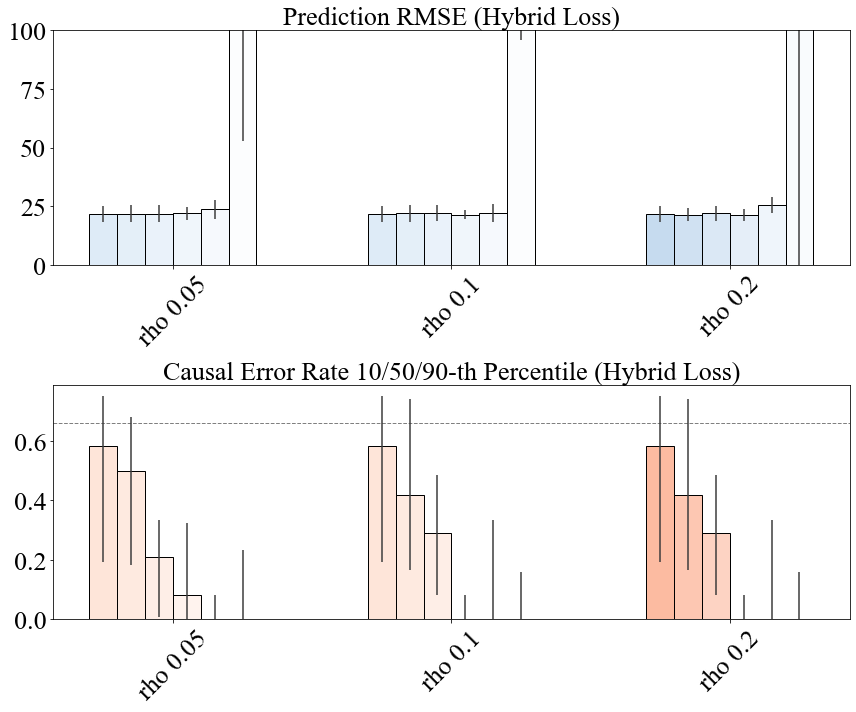

In [25]:
#corrupt

alphas = ["0", "1e-4", "1e-3", "1e-2", "1e-1", "1"]
models = ['rho 0.05',"rho 0.1", "rho 0.2"]
labels = models


# Custom colors for the bars
colors = ['#b3cde3',  # Very light blue for UVA
          '#8c96c6',  # Lighter blue for LP and LPSC
          '#8856a7',  # Medium blue for MNODE
          '#810f7c', '#810f7c', '#810f7c','#810f7c']  # Darker blue for the rest

data_pred = {
    "rho 0.05": ['21.807/3.468', '21.912/3.741', '21.887/3.593', '21.949/2.708', '23.8/4.014', '121.97/69.083'],
    "rho 0.1": ['21.807/3.468', '21.927/3.423', '22.073/3.288', '21.456/2.086', '22.145/3.998', '149.044/52.93'],
    "rho 0.2": ['21.807/3.468', '21.4/2.824', '22.003/3.075', '21.3/2.473', '25.505/3.539', '363.995/483.822'],
    #"Carb 1": ['21.807/3.468', '22.303/3.978', '21.863/3.774', '21.788/2.526', '24.651/2.882', '114.066/83.917'],
    #"Insulin 1": ['21.807/3.468', '21.14/2.866', '22.317/3.685', '22.688/4.526', '22.164/3.522', '150.021/85.362'],
    #"Both 1": ['21.807/3.468', '21.476/2.941', '21.589/3.384', '22.309/3.1', '24.346/3.939', '171.401/91.946']
}

data_rank={
    "rho 0.05": ['0.192/0.583/0.75', '0.184/0.5/0.681', '0.008/0.209/0.333', '0.0/0.083/0.325', '0.0/0.0/0.083', '0.0/0.0/0.233'],
    "rho 0.1": ['0.192/0.583/0.75', '0.167/0.417/0.742', '0.083/0.292/0.484', '0.0/0.0/0.083', '0.0/0.0/0.333', '0.0/0.0/0.159'],
    "rho 0.2": ['0.192/0.583/0.75', '0.167/0.417/0.742', '0.083/0.292/0.484', '0.0/0.0/0.083', '0.0/0.0/0.333', '0.0/0.0/0.159'],
    #"Carb 1": ['0.192/0.583/0.75', '0.258/0.542/0.742', '0.174/0.375/0.5', '0.0/0.125/0.492', '0.008/0.25/0.417', '0.0/0.417/0.725'],
    #"Insulin 1": ['0.192/0.583/0.75', '0.175/0.416/0.742', '0.091/0.167/0.492', '0.083/0.167/0.325', '0.091/0.167/0.167', '0.083/0.167/0.242'],
    #"Both 1": ['0.192/0.583/0.75', '0.333/0.458/0.665', '0.008/0.209/0.333', '0.0/0.083/0.475', '0.0/0.042/0.467', '0.0/0.0/0.083']
}



pred_values, pred_errors = get_values_errors(data_pred)
rank_values, rank_errors1, rank_errors2 = get_rank_errors(data_rank)

# Creating two subplots, one for data_pred and one for data_rank
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10),facecolor='white')

bar_width = 0.1
index = np.arange(len(models))

def get_gradation_colors(base_color, n):
    """Generates a gradation of colors from a base color to a lighter shade."""
    color = mcolors.to_rgb(base_color)
    # Adjust the factor to control the rate of color change
    factor = 0.9  # Adjust this value as needed to control the darkness
    return [mcolors.to_hex((color[0] + (1 - color[0]) * i / (n - 1) * factor, 
                            color[1] + (1 - color[1]) * i / (n - 1) * factor, 
                            color[2] + (1 - color[2]) * i / (n - 1) * factor)) for i in range(n)]

# Generate gradation colors for each model for predictions
gradation_colors_blue = [get_gradation_colors(color, len(alphas)) for color in colors_blue]

# Generate gradation colors for each model for rankings
gradation_colors_red = [get_gradation_colors(color, len(alphas)) for color in colors_red]

# Plotting bars with gradation colors for data_pred
for i, model in enumerate(models):
    for j, alpha in enumerate(alphas):
        ax1.bar(index[i] + j*bar_width, pred_values[i][j], yerr=pred_errors[i][j], 
                color=gradation_colors_blue[i][j], edgecolor='black', ecolor='#3b3b3b', 
                width=bar_width, label=f'α={alpha}' if i == 0 else "")

# Plotting bars with gradation colors for data_rank
for i, model in enumerate(models):
    for j, alpha in enumerate(alphas):
        ax2.bar(index[i] + j*bar_width, rank_values[i][j], yerr=[[rank_values[i][j]-rank_errors1[i][j]],\
                                                                 [rank_errors2[i][j]-rank_values[i][j]]], 
                color=gradation_colors_red[i][j], edgecolor='black', ecolor='#3b3b3b', 
                width=bar_width, label=f'α={alpha}' if i == 0 else "")


# Customizing the plot for aesthetics
ax1.set_title('Prediction RMSE (Hybrid Loss)', fontsize=26)
ax1.set_ylim([0,100])
ax2.set_title('Causal Error Rate 10/50/90-th Percentile (Hybrid Loss)', fontsize=26)
ax1.set_xticks(index + bar_width * 2.5)
ax2.set_xticks(index + bar_width * 2.5)
ax1.set_xticklabels(models, rotation=45, fontsize=26, color='black')
ax2.set_xticklabels(models, rotation=45, fontsize=26, color='black')
ax1.tick_params(axis='y', labelsize=26)  # Adjust the labelsize as needed for the first subplot
ax2.tick_params(axis='y', labelsize=26)  # Adjust the labelsize as needed for the second subplot

# Add a dashed light gray horizontal line at y=0.33 in the ranking subplot
ax2.axhline(y=0.66, color='gray', linestyle='--', linewidth=1, zorder=0)

plt.tight_layout()
plt.savefig("alphas_pred_and_causal.png", format='png', dpi=300)  # You can adjust the filename, format, and dpi as needed
plt.show()

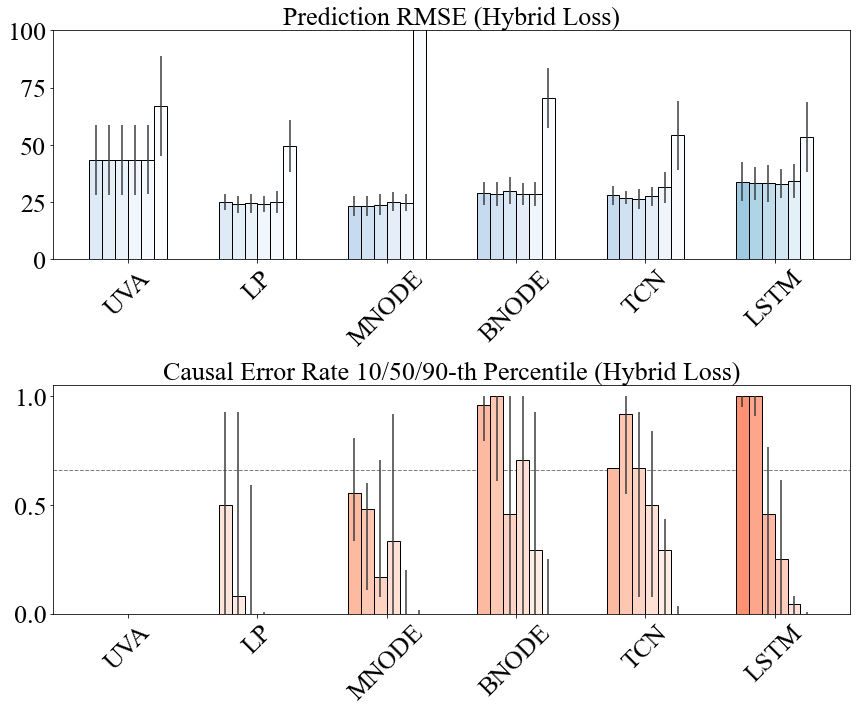

In [45]:
#cir

alphas = ["0", "1e-4", "1e-3", "1e-2", "1e-1", "1"]
models = ['UVA','LP','MNODE','BNODE','TCN','LSTM']
#models=['MNODE']
labels = models


# Custom colors for the bars
colors = ['#b3cde3',  # Very light blue for UVA
          '#8c96c6',  # Lighter blue for LP and LPSC
          '#8856a7',  # Medium blue for MNODE
          '#810f7c', '#810f7c', '#810f7c','#810f7c']  # Darker blue for the rest

data_pred = {
    "UVA": ['43.455/15.351', '43.467/15.328', '43.29/15.138', '43.379/15.362', '43.371/15.112', '67.038/21.869'],
    "LP" : ['24.795/3.484', '24.037/3.738', '24.329/4.198', '23.988/3.578', '25.007/4.67', '49.601/11.365'],
    "MNODE": ['23.212/4.42', '23.234/4.448', '23.701/4.525', '25.004/4.199', '24.578/3.769', '268.177/156.332'],
    "BNODE": ['28.667/5.192', '28.418/5.215', '29.914/5.893', '28.454/4.804', '28.506/5.216', '70.361/13.146'],
    "LSTM": ['33.843/8.61', '33.032/7.368', '33.168/8.136', '32.954/6.431', '34.0/7.427', '53.398/15.123'],
    "TCN": ['27.817/4.17', '26.837/2.93', '26.149/4.317', '27.352/3.98', '31.447/6.811', '54.101/15.11'],
    
}

data_rank={
    "UVA": ['0.0/0.0/0.0', '0.0/0.0/0.0', '0.0/0.0/0.0', '0.0/0.0/0.0', '0.0/0.0/0.0', '0.0/0.0/0.0'],
    "LP": ['0.0/0.5/0.925', '0.0/0.083/0.925', '0.0/0.0/0.591', '0.0/0.0/0.008', '0.0/0.0/0.0', '0.0/0.0/0.0'],
    "MNODE": ['0.333/0.552/0.809', '0.109/0.481/0.599', '0.075/0.167/0.705', '0.0/0.334/0.915', '0.0/0.0/0.2', '0.0/0.0/0.015'],
    "BNODE": ['0.791/0.958/1.0', '0.609/1.0/1.0', '0.0/0.458/1.0', '0.0/0.708/1.0', '0.0/0.292/0.925', '0.0/0.0/0.25'],
    "LSTM": ['0.95/1.0/1.0', '0.909/1.0/1.0', '0.0/0.458/0.767', '0.0/0.25/0.616', '0.0/0.042/0.083', '0.0/0.0/0.008'],
    "TCN": ['0.667/0.667/0.667', '0.55/0.917/1.0', '0.075/0.667/0.925', '0.075/0.5/0.841', '0.0/0.292/0.434', '0.0/0.0/0.033'],
    
}



pred_values, pred_errors = get_values_errors(data_pred)
rank_values, rank_errors1, rank_errors2 = get_rank_errors(data_rank)

# Creating two subplots, one for data_pred and one for data_rank
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10),facecolor='white')

bar_width = 0.1
index = np.arange(len(models))

def get_gradation_colors(base_color, n):
    """Generates a gradation of colors from a base color to a lighter shade."""
    color = mcolors.to_rgb(base_color)
    # Adjust the factor to control the rate of color change
    factor = 0.9  # Adjust this value as needed to control the darkness
    return [mcolors.to_hex((color[0] + (1 - color[0]) * i / (n - 1) * factor, 
                            color[1] + (1 - color[1]) * i / (n - 1) * factor, 
                            color[2] + (1 - color[2]) * i / (n - 1) * factor)) for i in range(n)]

# Generate gradation colors for each model for predictions
gradation_colors_blue = [get_gradation_colors(color, len(alphas)) for color in colors_blue]

# Generate gradation colors for each model for rankings
gradation_colors_red = [get_gradation_colors(color, len(alphas)) for color in colors_red]

# Plotting bars with gradation colors for data_pred
for i, model in enumerate(models):
    for j, alpha in enumerate(alphas):
        ax1.bar(index[i] + j*bar_width, pred_values[i][j], yerr=pred_errors[i][j], 
                color=gradation_colors_blue[i][j], edgecolor='black', ecolor='#3b3b3b', 
                width=bar_width, label=f'α={alpha}' if i == 0 else "")

# Plotting bars with gradation colors for data_rank
for i, model in enumerate(models):
    for j, alpha in enumerate(alphas):
        ax2.bar(index[i] + j*bar_width, rank_values[i][j], yerr=[[rank_values[i][j]-rank_errors1[i][j]],\
                                                                 [rank_errors2[i][j]-rank_values[i][j]]], 
                color=gradation_colors_red[i][j], edgecolor='black', ecolor='#3b3b3b', 
                width=bar_width, label=f'α={alpha}' if i == 0 else "")


# Customizing the plot for aesthetics
ax1.set_title('Prediction RMSE (Hybrid Loss)', fontsize=26)
ax1.set_ylim([0,100])
ax2.set_title('Causal Error Rate 10/50/90-th Percentile (Hybrid Loss)', fontsize=26)
ax1.set_xticks(index + bar_width * 2.5)
ax2.set_xticks(index + bar_width * 2.5)
ax1.set_xticklabels(models, rotation=45, fontsize=26, color='black')
ax2.set_xticklabels(models, rotation=45, fontsize=26, color='black')
ax1.tick_params(axis='y', labelsize=26)  # Adjust the labelsize as needed for the first subplot
ax2.tick_params(axis='y', labelsize=26)  # Adjust the labelsize as needed for the second subplot

# Add a dashed light gray horizontal line at y=0.33 in the ranking subplot
ax2.axhline(y=0.66, color='gray', linestyle='--', linewidth=1, zorder=0)

plt.tight_layout()
plt.savefig("alphas_pred_and_causal.png", format='png', dpi=300)  # You can adjust the filename, format, and dpi as needed
plt.show()

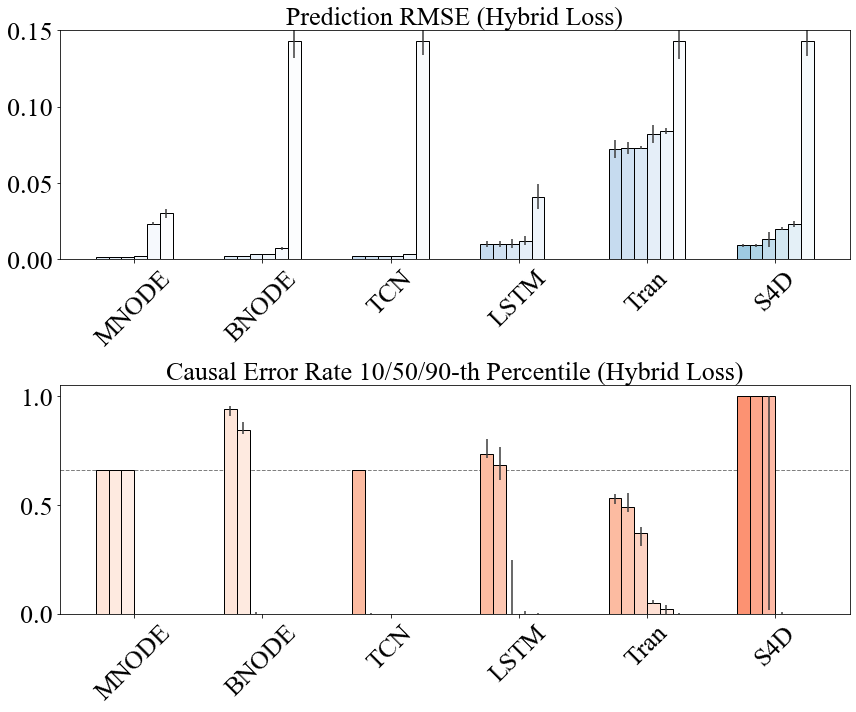

In [36]:
#synthetic

alphas = ["0", "1e-4", "1e-3", "1e-2", "1e-1", "1"]
models = ["MNODE","BNODE", "TCN","LSTM",'Tran','S4D']
labels = models


# Custom colors for the bars
colors = ['#b3cde3',  # Very light blue for UVA
          '#8c96c6',  # Lighter blue for LP and LPSC
          '#8856a7',  # Medium blue for MNODE
          '#810f7c', '#810f7c', '#810f7c','#810f7c']  # Darker blue for the rest

data_pred = {
    "MNODE": ['0.001/0.0', '0.001/0.0', '0.001/0.0', '0.002/0.0', '0.023/0.001', '0.03/0.003'],
    "BNODE": ['0.002/0.0', '0.002/0.0', '0.003/0.0', '0.003/0.0', '0.007/0.001', '0.143/0.011'],
    "TCN": ['0.002/0.0', '0.002/0.0', '0.002/0.0', '0.002/0.0', '0.003/0.0', '0.143/0.009'],
    "LSTM": ['0.01/0.002', '0.01/0.002', '0.01/0.003', '0.012/0.003', '0.041/0.008', '0/0'],
    'Tran': ['0.072/0.006', '0.073/0.004', '0.073/0.001', '0.082/0.006', '0.084/0.002', '0.143/0.012'],
    "S4D": ['0.009/0.001', '0.009/0.001', '0.013/0.005', '0.02/0.001', '0.023/0.002', '0.143/0.01']
}

data_rank={
    "MNODE": ['0.66/0.66/0.66', '0.66/0.66/0.66', '0.66/0.66/0.66', '0.0/0.0/0.0', '0.0/0.0/0.0', '0.0/0.0/0.0'],
    "BNODE": ['0.907/0.94/0.954', '0.823/0.845/0.881', '0.0/0.0/0.009', '0.0/0.0/0.0', '0.0/0.0/0.0', '0.0/0.0/0.0'],
    "TCN": ['0.66/0.66/0.66', '0.0/0.0/0.003', '0.0/0.0/0.0', '0.0/0.0/0.0', '0.0/0.0/0.0', '0.0/0.0/0.0'],
    "LSTM": ['0.715/0.735/0.8', '0.613/0.685/0.766', '0.0/0.0/0.247', '0.0/0.0/0.012', '0.0/0.0/0.003', '0/0/0'],
    "Tran": ['0.504/0.53/0.551', '0.467/0.49/0.552', '0.309/0.37/0.4', '0.044/0.05/0.062', '0.0/0.02/0.039', '0.0/0.0/0.003'],
    "S4D": ['1.0/1.0/1.0', '1.0/1.0/1.0', '0.017/1.0/1.0', '0.0/0.0/0.006', '0.0/0.0/0.0', '0.0/0.0/0.0']
}



pred_values, pred_errors = get_values_errors(data_pred)
rank_values, rank_errors1, rank_errors2 = get_rank_errors(data_rank)

# Creating two subplots, one for data_pred and one for data_rank
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10),facecolor='white')

bar_width = 0.1
index = np.arange(len(models))

def get_gradation_colors(base_color, n):
    """Generates a gradation of colors from a base color to a lighter shade."""
    color = mcolors.to_rgb(base_color)
    # Adjust the factor to control the rate of color change
    factor = 0.9  # Adjust this value as needed to control the darkness
    return [mcolors.to_hex((color[0] + (1 - color[0]) * i / (n - 1) * factor, 
                            color[1] + (1 - color[1]) * i / (n - 1) * factor, 
                            color[2] + (1 - color[2]) * i / (n - 1) * factor)) for i in range(n)]

# Generate gradation colors for each model for predictions
gradation_colors_blue = [get_gradation_colors(color, len(alphas)) for color in colors_blue]

# Generate gradation colors for each model for rankings
gradation_colors_red = [get_gradation_colors(color, len(alphas)) for color in colors_red]

# Plotting bars with gradation colors for data_pred
for i, model in enumerate(models):
    for j, alpha in enumerate(alphas):
        ax1.bar(index[i] + j*bar_width, pred_values[i][j], yerr=pred_errors[i][j], 
                color=gradation_colors_blue[i][j], edgecolor='black', ecolor='#3b3b3b', 
                width=bar_width, label=f'α={alpha}' if i == 0 else "")

# Plotting bars with gradation colors for data_rank
for i, model in enumerate(models):
    for j, alpha in enumerate(alphas):
        ax2.bar(index[i] + j*bar_width, rank_values[i][j], yerr=[[rank_values[i][j]-rank_errors1[i][j]],\
                                                                 [rank_errors2[i][j]-rank_values[i][j]]], 
                color=gradation_colors_red[i][j], edgecolor='black', ecolor='#3b3b3b', 
                width=bar_width, label=f'α={alpha}' if i == 0 else "")


# Customizing the plot for aesthetics
ax1.set_title('Prediction RMSE (Hybrid Loss)', fontsize=26)
ax1.set_ylim([0,0.15])
ax2.set_title('Causal Error Rate 10/50/90-th Percentile (Hybrid Loss)', fontsize=26)
ax1.set_xticks(index + bar_width * 2.5)
ax2.set_xticks(index + bar_width * 2.5)
ax1.set_xticklabels(models, rotation=45, fontsize=26, color='black')
ax2.set_xticklabels(models, rotation=45, fontsize=26, color='black')
ax1.tick_params(axis='y', labelsize=26)  # Adjust the labelsize as needed for the first subplot
ax2.tick_params(axis='y', labelsize=26)  # Adjust the labelsize as needed for the second subplot

# Add a dashed light gray horizontal line at y=0.33 in the ranking subplot
ax2.axhline(y=0.66, color='gray', linestyle='--', linewidth=1, zorder=0)

plt.tight_layout()
plt.savefig("alphas_pred_and_causal.png", format='png', dpi=300)  # You can adjust the filename, format, and dpi as needed
plt.show()

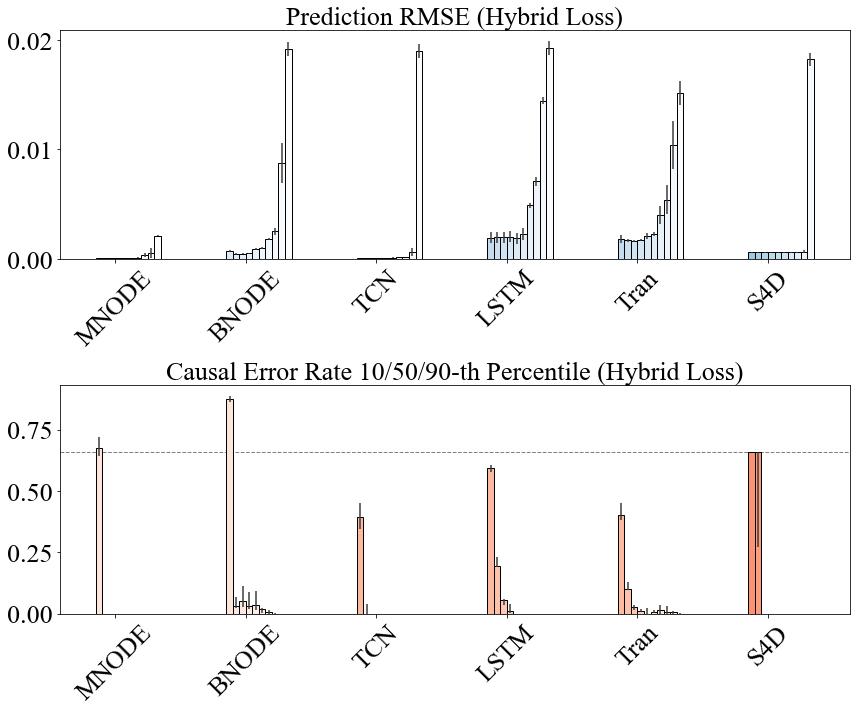

In [53]:
#synthetic

alphas = ["0", "1e-4", "5e-4", "1e-3", "5e-3", "1e-2", "5e-2", "1e-1", "5e-1", "1"]
models = ["MNODE","BNODE", "TCN","LSTM",'Tran','S4D']
labels = models


# Custom colors for the bars
colors = ['#b3cde3',  # Very light blue for UVA
          '#8c96c6',  # Lighter blue for LP and LPSC
          '#8856a7',  # Medium blue for MNODE
          '#810f7c', '#810f7c', '#810f7c','#810f7c']  # Darker blue for the rest

data_pred = {
    "MNODE": ['7.6e-05/3e-06', '7.5e-05/3e-06', '7.6e-05/4e-06', '7.6e-05/3e-06', '7.7e-05/3e-06', '8e-05/3e-06', '0.000105/5.4e-05', '0.00037/0.000178', '0.000506/0.000459', '0.00211/3.5e-05'],
    "BNODE": ['0.000716/8.4e-05', '0.000434/8.5e-05', '0.000486/5.7e-05', '0.000519/6.6e-05', '0.000873/9.9e-05', '0.001016/0.00011', '0.001825/5.9e-05', '0.002544/0.000321', '0.008782/0.001812', '0.019164/0.000649'],
    "TCN": ['0.000106/7e-06', '9.2e-05/5e-06', '9.1e-05/5e-06', '0.000112/1e-05', '0.000106/8e-06', '0.000129/1.3e-05', '0.000142/8e-06', '0.000145/8e-06', '0.000598/0.000362', '0.019003/0.000623'],
    "LSTM": ['0.001925/0.000494', '0.001986/0.0005', '0.001982/0.000486', '0.002026/0.000482', '0.001874/0.000468', '0.002299/0.000561', '0.004896/0.00021', '0.007073/0.000406', '0.014457/0.00034', '0.019239/0.000617'],
    'Tran': ['0.001829/0.000392', '0.001701/0.00016', '0.001648/0.000106', '0.001728/0.000134', '0.002067/0.000264', '0.002265/0.000214', '0.004012/0.000789', '0.005408/0.001332', '0.010392/0.002167', '0.015157/0.001101'],
    "S4D": ['0.000605/4e-05', '0.000605/4e-05', '0.000605/4e-05', '0.000605/4e-05', '0.000605/4e-05', '0.000606/3.9e-05', '0.000615/3.8e-05', '0.000628/4e-05', '0.000674/0.000104', '0.018215/0.000587']
}

data_rank={
    "MNODE": ['0.643/0.675/0.718', '0.0/0.0/0.0', '0.0/0.0/0.0', '0.0/0.0/0.0', '0.0/0.0/0.0', '0.0/0.0/0.0', '0.0/0.0/0.0', '0.0/0.0/0.0', '0.0/0.0/0.00', '0.00/0.00/0.00'],
    "BNODE": ['0.862/0.875/0.887', '0.022/0.03/0.066', '0.027/0.05/0.112', '0.018/0.03/0.088', '0.013/0.035/0.092', '0.004/0.02/0.023', '0.0/0.005/0.015', '0.0/0.0/0.003', '0.0/0.0/0.0', '0.0/0.0/0.0'],
    "TCN": ['0.344/0.395/0.452', '0.0/0.0/0.039', '0.0/0.0/0.0', '0.0/0.0/0.0', '0.0/0.0/0.0', '0.0/0.0/0.0', '0.0/0.0/0.0', '0.0/0.0/0.0', '0.0/0.0/0.0', '0.0/0.0/0.0'],
    "LSTM": ['0.578/0.595/0.606', '0.19/0.195/0.232', '0.034/0.055/0.058', '0.004/0.01/0.037', '0.0/0.0/0.0', '0.0/0.0/0.0', '0.0/0.0/0.0', '0.0/0.0/0.0', '0.0/0.0/0.0', '0.0/0.0/0.0'],
    "Tran": ['0.382/0.4/0.449', '0.095/0.1/0.129', '0.016/0.025/0.036', '0.007/0.01/0.018', '0.0/0.0/0.023', '0.002/0.005/0.013', '0.0/0.015/0.036', '0.0/0.005/0.029', '0.0/0.005/0.011', '0.0/0.0/0.003'],
    "S4D": ['0.66/0.66/0.66', '0.27/0.66/0.66', '0.0/0.0/0.0', '0.0/0.0/0.0', '0.0/0.0/0.0', '0.0/0.0/0.0', '0.0/0.0/0.0', '0.0/0.0/0.0', '0.0/0.0/0.0', '0.0/0.0/0.0']
}



pred_values, pred_errors = get_values_errors(data_pred)
rank_values, rank_errors1, rank_errors2 = get_rank_errors(data_rank)

# Creating two subplots, one for data_pred and one for data_rank
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10),facecolor='white')

bar_width = 0.05
index = np.arange(len(models))

def get_gradation_colors(base_color, n):
    """Generates a gradation of colors from a base color to a lighter shade."""
    color = mcolors.to_rgb(base_color)
    # Adjust the factor to control the rate of color change
    factor = 0.9  # Adjust this value as needed to control the darkness
    return [mcolors.to_hex((color[0] + (1 - color[0]) * i / (n - 1) * factor, 
                            color[1] + (1 - color[1]) * i / (n - 1) * factor, 
                            color[2] + (1 - color[2]) * i / (n - 1) * factor)) for i in range(n)]

# Generate gradation colors for each model for predictions
gradation_colors_blue = [get_gradation_colors(color, len(alphas)) for color in colors_blue]

# Generate gradation colors for each model for rankings
gradation_colors_red = [get_gradation_colors(color, len(alphas)) for color in colors_red]

# Plotting bars with gradation colors for data_pred
for i, model in enumerate(models):
    for j, alpha in enumerate(alphas):
        ax1.bar(index[i] + j*bar_width, pred_values[i][j], yerr=pred_errors[i][j], 
                color=gradation_colors_blue[i][j], edgecolor='black', ecolor='#3b3b3b', 
                width=bar_width, label=f'α={alpha}' if i == 0 else "")

# Plotting bars with gradation colors for data_rank
for i, model in enumerate(models):
    for j, alpha in enumerate(alphas):
        ax2.bar(index[i] + j*bar_width, rank_values[i][j], yerr=[[rank_values[i][j]-rank_errors1[i][j]],\
                                                                 [rank_errors2[i][j]-rank_values[i][j]]], 
                color=gradation_colors_red[i][j], edgecolor='black', ecolor='#3b3b3b', 
                width=bar_width, label=f'α={alpha}' if i == 0 else "")


# Customizing the plot for aesthetics
ax1.set_title('Prediction RMSE (Hybrid Loss)', fontsize=26)
#ax1.set_ylim([0,0.15])
ax2.set_title('Causal Error Rate 10/50/90-th Percentile (Hybrid Loss)', fontsize=26)
ax1.set_xticks(index + bar_width * 2.5)
ax2.set_xticks(index + bar_width * 2.5)
ax1.set_xticklabels(models, rotation=45, fontsize=26, color='black')
ax2.set_xticklabels(models, rotation=45, fontsize=26, color='black')
ax1.tick_params(axis='y', labelsize=26)  # Adjust the labelsize as needed for the first subplot
ax2.tick_params(axis='y', labelsize=26)  # Adjust the labelsize as needed for the second subplot

# Add a dashed light gray horizontal line at y=0.33 in the ranking subplot
ax2.axhline(y=0.66, color='gray', linestyle='--', linewidth=1, zorder=0)

plt.tight_layout()
plt.savefig("alphas_pred_and_causal.png", format='png', dpi=300)  # You can adjust the filename, format, and dpi as needed
plt.show()